In [1]:
import pandas as pd

df = pd.read_csv('medical_cases_train.csv') #load dataset

# Calculate lengths
df['transcription_length'] = df['transcription'].apply(lambda x: len(str(x).split()))
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))


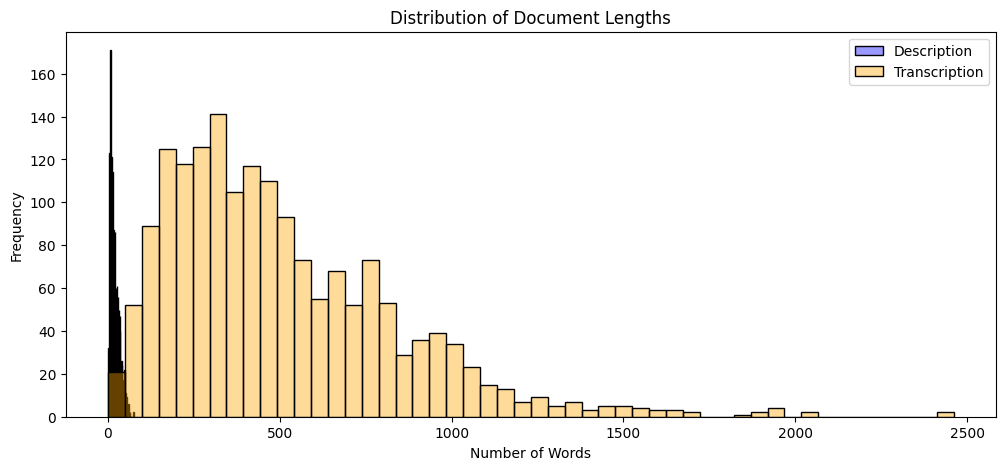

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
plt.figure(figsize=(12,5))
sns.histplot(df['description_length'], bins=50, color='blue', alpha=0.4, label="Description")
sns.histplot(df['transcription_length'], bins=50, color='orange', alpha=0.4, label="Transcription")
plt.legend()
plt.title("Distribution of Document Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

The above histogram compares the length of descriptions vs transcriptions across the dataset by overlapping on top of each other.

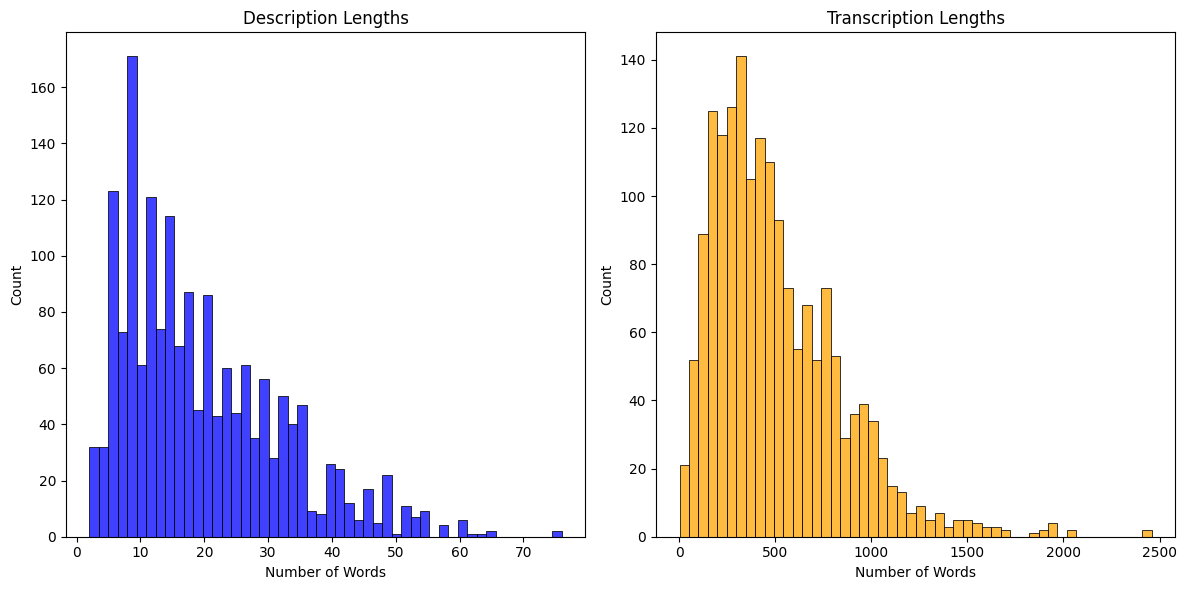

In [3]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df['description_length'], bins=50, color='blue')
plt.title("Description Lengths")
plt.xlabel("Number of Words")

plt.subplot(1,2,2)
sns.histplot(df['transcription_length'], bins=50, color='orange')
plt.title("Transcription Lengths")
plt.xlabel("Number of Words")

plt.tight_layout()
plt.show()


The above histogram compares the length of descriptions vs transcriptions across the dataset by depicting them side by side.

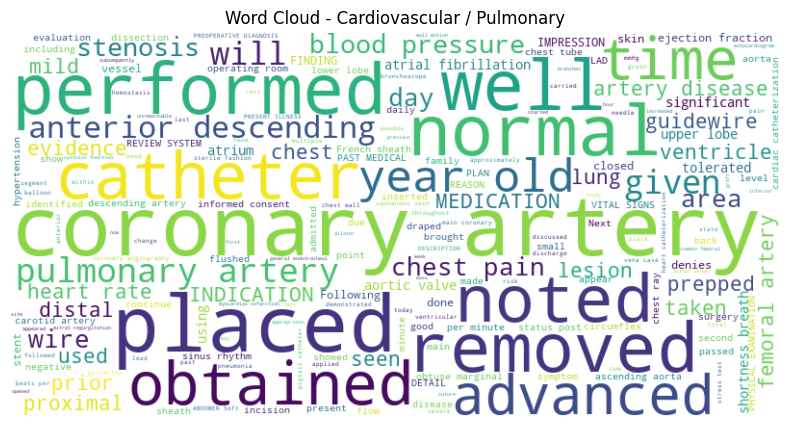

In [4]:
from wordcloud import WordCloud, STOPWORDS

# Add custom stopwords (to remove common non-medical words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["patient", "procedure", "history", "left", "right", "one", "two", "three"])  


specialty = "Cardiovascular / Pulmonary"
text = " ".join(df[df['medical_specialty'] == specialty]['transcription'].astype(str))

wc = WordCloud(width=800, height=400, background_color='white',
               stopwords=custom_stopwords,
               min_word_length=3,   # removes short meaningless words
               colormap='viridis').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud - {specialty}")
plt.show()


The above code shows the most used text larger and least used text smaller

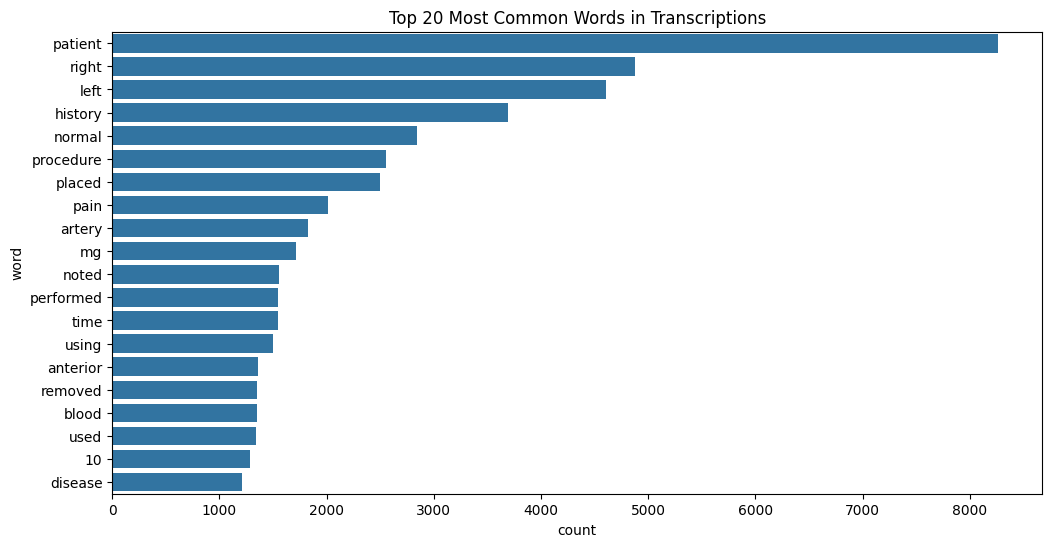

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer(stop_words='english', max_features=20)
cv_fit = cv.fit_transform(df['transcription'].astype(str))

word_freq = np.array(cv_fit.sum(axis=0)).flatten()
words = cv.get_feature_names_out()

freq_df = pd.DataFrame({'word': words, 'count': word_freq})
freq_df = freq_df.sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="count", y="word", data=freq_df)
plt.title("Top 20 Most Common Words in Transcriptions")
plt.show()


C:\Users\Roshen Perera\AppData\Local\Temp\ipykernel_28388\1596547064.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.values, y=class_counts.index, palette="viridis")


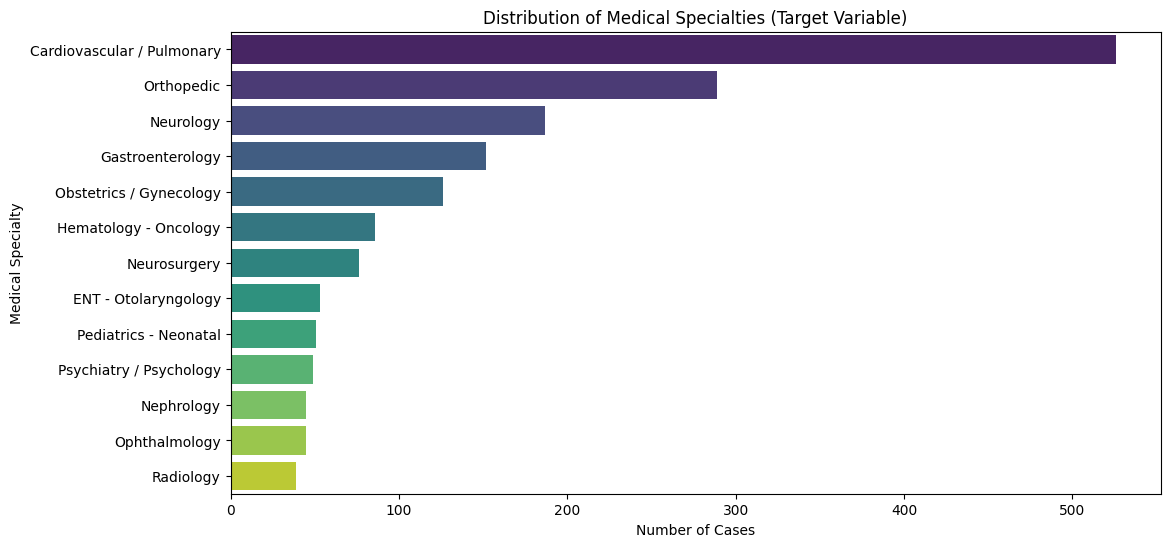

In [6]:

# Count the number of samples per class
class_counts = df['medical_specialty'].value_counts()

# Plot which depicts the medical specialities usage
plt.figure(figsize=(12,6))
sns.barplot(x=class_counts.values, y=class_counts.index, palette="viridis")

plt.title("Distribution of Medical Specialties (Target Variable)")
plt.xlabel("Number of Cases")
plt.ylabel("Medical Specialty")
plt.show()


Visualized the distribution of the 13 classes in the medical_specialty target variable to identify any class imbalance.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english',
                        lowercase=True,
                        max_features=5000,  # optional: limit vocabulary size
                        ngram_range=(1,2)) # optional: use unigrams + bigrams

# Fit and transform the transcription column
X_tfidf = tfidf.fit_transform(df['transcription'])

print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (1724, 5000)


In [8]:
import joblib
from scipy import sparse

# Save features
sparse.save_npz("X_tfidf.npz", X_tfidf)

# Save labels
df['medical_specialty'].to_csv("y_labels.csv", index=False)

# Save vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']